# Email classification using Naive Bayes classifier methods

Cette recherche examine une comparaison entre trois approches différentes pour classer les e-mails en fonction de leurs catégories.

1- Naive Bayes
2- Random Forest
3- SVNL

L’algorithme des « forêts aléatoires » (ou Random Forest parfois aussi traduit par forêt d’arbres décisionnels) est un algorithme de classification qui réduit la variance des prévisions d’un arbre de décision seul, améliorant ainsi leurs performances. Pour cela, il combine de nombreux arbres de décisions dans une approche de type bagging.

Extracting features
Accuracy: 97.3076923076923
matrice de confusion [[125   5]
 [  2 128]]

 Confusion matrix: 



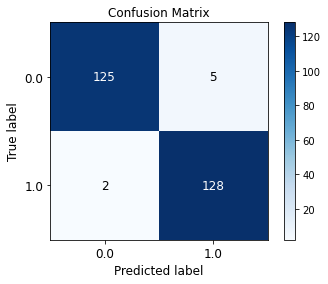



              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97       130
         1.0       0.96      0.98      0.97       130

    accuracy                           0.97       260
   macro avg       0.97      0.97      0.97       260
weighted avg       0.97      0.97      0.97       260



In [1]:
from collections import Counter
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import scikitplot as skplt
import matplotlib.pyplot as plt



data = {}


def build_data(root):
    all_words = []
    files = [os.path.join(root, file) for file in os.listdir(root)]

    global data


    for file in files:
        with open(file) as f:
            for line in f:
                words = line.split()
                all_words += words

    frequent = Counter(all_words)

    all_keys = list(frequent)

    for key in all_keys:
        if key.isalpha() == False:
            del frequent[key]

    frequent = frequent.most_common(2500)

    count = 0
    for word in frequent:
        data[word[0]] = count
        count += 1


def feature_extraction(root):
    files = [os.path.join(root, file) for file in os.listdir(root)]
    matrix = np.zeros((len(files), 2500))
    labels = np.zeros(len(files))
    file_count = 0

    for file in files:
        with open(file) as file_obj:
            for index, line in enumerate(file_obj):
                if index == 2:
                    line = line.split()
                    for word in line:
                        if word in data:
                            matrix[file_count, data[word]] = line.count(word)

        labels[file_count] = 0
        if 'spmsg' in file:
            labels[file_count] = 1
        file_count += 1
    return matrix, labels


if __name__ == '__main__':
    training_data = '/home/le/Documents/Python_Env/EMAIL/dataset/training-data'
    testing_data = '/home/le/Documents/Python_Env/EMAIL/dataset/testing-data'
    # Building word data
    build_data(training_data)

    print('Extracting features')
    training_feature_x, training_labels_y = feature_extraction(training_data)
    testing_features_x, testing_labels_y = feature_extraction(testing_data)

    model = RandomForestClassifier(n_estimators=30, criterion='entropy')
    model.fit(training_feature_x, training_labels_y)


    # Predicting
    predicted_labels = model.predict(testing_features_x)
    print('Accuracy:', accuracy_score(testing_labels_y, predicted_labels) * 100)

    matrice_confusion = confusion_matrix(testing_labels_y, predicted_labels)
    
    
    print('matrice de confusion', matrice_confusion)
    print("\n Confusion matrix: \n")
    skplt.metrics.plot_confusion_matrix(testing_labels_y,predicted_labels, title="Confusion Matrix", text_fontsize='large')
    plt.show()
    print('\n')
    print (classification_report(testing_labels_y, model.predict(testing_features_x)))

# Conclusion 2

Avec la methode Random Forest, nous obtenons une precision de 97,3% plus meilleur que celle NAIVES BAYES etudie dans le premier cas. 

La matrice de confusion ci dessus nous aide a evaluer notre modele.